<a href="https://colab.research.google.com/github/spsgim/Scaler_Projects/blob/main/Business_Case_OLA_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: OLA - Ensemble Learning

**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)
- Historical data regarding the performance of the driver (Quarterly rating, - Monthly business acquired, grade, Income)

Dataset:
Dataset Link: <a href="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv">ola_driver.csv</a>

**Column Profiling:**

1. MMMM-YY : Reporting Date (Monthly)
2. Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10. Joining Designation : Designation of the driver at the time of joining
11. Grade : Grade of the driver at the time of reporting
12. Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

**Concepts Tested:**

- Ensemble Learning- Bagging
- Ensemble Learning- Boosting
- KNN Imputation of Missing Values
- Working with an imbalanced dataset

**What "good" looks like:**

- Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset.

- Convert date-like features to their respective data type

- Check for missing values and Prepare data for KNN Imputation

  - You may consider only numerical features for this purpose

- Aggregate data in order to remove multiple occurrences of same driver data (We did something similar in Delhivery business Case)

  - You can start from storing unique Driver IDs in an empty dataframe and then bring all the features at same level (Groupby Driver ID)

- Feature Engineering Steps:

  - Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

  - Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

  - Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

- Statistical summary of the derived dataset

- Check correlation among independent variables and how they interact with each other

- One hot encoding of the categorical variable

- Class Imbalance Treatment

- Standardization of training data

- Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning

- Results Evaluation:

  - Classification Report

  - ROC AUC curve

- Provide actionable Insights & Recommendations

**Evaluation Criteria (100 Points):**

1. Define Problem Statement and perform Exploratory Data Analysis (10 points)
  - Definition of problem (as per given problem statement with additional views)
  - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
  - Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
  - Bivariate Analysis (Relationships between important variables)
  - Illustrate the insights based on EDA
    - Comments on range of attributes, outliers of various attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots

2. Data Preprocessing (50 Points)
    - KNN Imputation
    - Feature Engineering
    - Class Imbalance treatment
    - Standardization
    - Encoding

3. Model building (20 Points)
  - 1 Ensemble - Bagging Algorithm
  - 1 Ensemble - Boosting Algorithm

4. Results Evaluation (10 Points)
  - ROC AUC Curve & comments
  - Classification Report (Confusion Matrix etc)

5. Actionable Insights & Recommendations (10 Points)

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.model_selection import cross_val_score, RepeatedKFold

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Importing Dataset

In [3]:
ola = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')
ola.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
## Dropping Unnamed column
ola.drop('Unnamed: 0', axis=1, inplace=True)

# 1. Problem Statement and Exploratory Data Analysis

  - Definition of problem (as per given problem statement with additional views)
  - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
  - Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
  - Bivariate Analysis (Relationships between important variables)
  - Illustrate the insights based on EDA
    - Comments on range of attributes, outliers of various attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots

## Problem Statement

The constant challenge Ola faces is the churn rate of its drivers. Ensuring driver loyalty and reducing attrition are crucial to the company's operation.

## Basic Exploration

In [5]:
# Creating a copy of the original dataset
df1 = ola.copy()

In [6]:
## Getting the shape of the dataset
df1.shape

(19104, 13)

In [7]:
## Getting a summary of variables in the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


We have missing values

In [8]:
## Detecting Missing Values
df1.isna().mean().sort_values(ascending=False)*100

LastWorkingDate         91.541039
Age                      0.319305
Gender                   0.272194
MMM-YY                   0.000000
Driver_ID                0.000000
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [9]:
df1.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


- As we can see in the dataset, we have month on month data for a driver, distributed among multiple rows. This suggest grouping or aggregating data on `Driver_ID`.
- Last working date is present (in the last row for each Driver_ID) for Drivers who has left the organisation while it is `NaN` for those drivers who are working. Thus, We can extract our target column from the Last Working Date column.

## Aggregation and Feature Engineering

In [10]:
df_temp = df1.copy()

In [11]:
df_temp['LastWorkingDate']= df_temp.groupby(['Driver_ID'])['LastWorkingDate'].fillna(method= 'bfill')

In [12]:
df_temp['LastWorkingDate']=pd.to_datetime(df_temp['LastWorkingDate'])
df_temp['Dateofjoining']=pd.to_datetime(df_temp['Dateofjoining'])

In [13]:
agg_dict = {
    'MMM-YY': 'count',
    'Age': "max",
    'Gender': 'first',
    'City': 'last',
    'Education_Level': 'max',
    'Income': 'mean',
    'Dateofjoining': 'first',
    'LastWorkingDate': 'last',
    'Joining Designation': 'last',
    'Grade': 'max',
    'Total Business Value': 'sum',
    'Quarterly Rating': 'mean'
    }

In [14]:
df_merged = df_temp.groupby(['Driver_ID']).agg(agg_dict)
df_merged.head()

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
Driver_ID,,,,,,,,,,,,
1,3,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0
2,2,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.0
4,5,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0
5,3,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0
6,5,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6


In [15]:
df_merged.rename(columns= {
    "MMM-YY":"#Records",
    'Income': 'Income_mean',
    "Quarterly Rating":"Rating_mean"
  }, inplace= True)

In [16]:
max_income_driver = df_temp.groupby(['Driver_ID'])['Income'].max()
min_income_driver = df_temp.groupby(['Driver_ID'])['Income'].min()
MaxMin_incomes = pd.merge(max_income_driver, min_income_driver, on = 'Driver_ID', how='outer', suffixes=["_max", '_min'])
MaxMin_incomes.head()

,Income_max,Income_min
Driver_ID,,
1,57387,57387
2,67016,67016
4,65603,65603
5,46368,46368
6,78728,78728


In [17]:
df_merged = pd.merge(left= df_merged, right= MaxMin_incomes,  how = 'left', left_index=True, right_index=True)
df_merged.head(5)

,#Records,Age,Gender,City,Education_Level,Income_mean,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Rating_mean,Income_max,Income_min
Driver_ID,,,,,,,,,,,,,,
1,3,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,57387,57387
2,2,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.0,67016,67016
4,5,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,65603,65603
5,3,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,46368,46368
6,5,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6,78728,78728


In [18]:
last_date_for_working = pd.to_datetime(df1['MMM-YY']).max().date()
last_date_for_working

datetime.date(2020, 12, 1)

In [19]:
df_merged['Last_Date'] = df_merged["LastWorkingDate"]
df_merged['Last_Date'].fillna(last_date_for_working , inplace=True)

In [20]:
df_merged['Last_Date'] = pd.to_datetime(df_merged['Last_Date'])
df_merged['Dateofjoining'] = pd.to_datetime(df_merged['Dateofjoining'])

<ipython-input-20-982c9952ac65>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_merged['Last_Date'] = pd.to_datetime(df_merged['Last_Date'])
<ipython-input-20-982c9952ac65>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_merged['Last_Date'] = pd.to_datetime(df_merged['Last_Date'])
<ipython-input-20-982c9952ac65>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_merged['Last_Date'] = p

In [21]:
df_merged['OLA_WorkEx_years']= (df_merged['Last_Date'] - df_merged['Dateofjoining'])/np.timedelta64(1,'Y')

In [22]:
df_merged['Income_%CAGR']  = 100*((df_merged["Income_max"]/df_merged["Income_min"])**(1/df_merged['OLA_WorkEx_years'])-1)

In [23]:
df_merged.head(5)

,#Records,Age,Gender,City,Education_Level,Income_mean,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Rating_mean,Income_max,Income_min,Last_Date,OLA_WorkEx_years,Income_%CAGR
Driver_ID,,,,,,,,,,,,,,,,,
1,3,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,57387,57387,2019-03-11,0.210819,0.0
2,2,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.0,67016,67016,2020-12-01,0.068448,0.0
4,5,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,65603,65603,2020-04-27,0.388783,0.0
5,3,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,46368,46368,2019-03-07,0.156061,0.0
6,5,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6,78728,78728,2020-12-01,0.336763,0.0


In [24]:
rating_max = df_temp.groupby(['Driver_ID'])['Quarterly Rating'].max()
rating_min = df_temp.groupby(['Driver_ID'])['Quarterly Rating'].min()
MaxMin_ratings = pd.merge(rating_max, rating_min, on = 'Driver_ID', how='outer', suffixes=["_max", '_min'])

In [25]:
df_merged = pd.merge(left= df_merged, right= MaxMin_ratings,  how = 'left', left_index=True, right_index=True)
df_merged['Rating_improvement'] = (df_merged['Quarterly Rating_max'] - df_merged['Quarterly Rating_min'])

In [26]:
df_merged['City'] = df_merged['City'].str[1:]

In [27]:
df_merged['Churn'] = df_merged['LastWorkingDate'].notna().astype('int')
df_merged.head(5)

,#Records,Age,Gender,City,Education_Level,Income_mean,Dateofjoining,LastWorkingDate,Joining Designation,Grade,...,Rating_mean,Income_max,Income_min,Last_Date,OLA_WorkEx_years,Income_%CAGR,Quarterly Rating_max,Quarterly Rating_min,Rating_improvement,Churn
Driver_ID,,,,,,,,,,,,,,,,,,,,,
1,3,28.0,0.0,23,2,57387.0,2018-12-24,2019-03-11,1,1,...,2.0,57387,57387,2019-03-11,0.210819,0.0,2,2,0,1
2,2,31.0,0.0,7,2,67016.0,2020-11-06,NaT,2,2,...,1.0,67016,67016,2020-12-01,0.068448,0.0,1,1,0,0
4,5,43.0,0.0,13,2,65603.0,2019-12-07,2020-04-27,2,2,...,1.0,65603,65603,2020-04-27,0.388783,0.0,1,1,0,1
5,3,29.0,0.0,9,0,46368.0,2019-01-09,2019-03-07,1,1,...,1.0,46368,46368,2019-03-07,0.156061,0.0,1,1,0,1
6,5,31.0,1.0,11,1,78728.0,2020-07-31,NaT,3,3,...,1.6,78728,78728,2020-12-01,0.336763,0.0,2,1,1,0


In [28]:
df_merged.loc[537]

#Records                                 13
Age                                    35.0
Gender                                  1.0
City                                     29
Education_Level                           1
Income_mean                    78641.692308
Dateofjoining           2019-12-06 00:00:00
LastWorkingDate                         NaT
Joining Designation                       2
Grade                                     3
Total Business Value               23376420
Rating_mean                        3.769231
Income_max                            84554
Income_min                            76868
Last_Date               2020-12-01 00:00:00
OLA_WorkEx_years                   0.988384
Income_%CAGR                      10.122225
Quarterly Rating_max                      4
Quarterly Rating_min                      1
Rating_improvement                        3
Churn                                     0
Name: 537, dtype: object

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 1 to 2788
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   #Records              2381 non-null   int64         
 1   Age                   2381 non-null   float64       
 2   Gender                2381 non-null   float64       
 3   City                  2381 non-null   object        
 4   Education_Level       2381 non-null   int64         
 5   Income_mean           2381 non-null   float64       
 6   Dateofjoining         2381 non-null   datetime64[ns]
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   Joining Designation   2381 non-null   int64         
 9   Grade                 2381 non-null   int64         
 10  Total Business Value  2381 non-null   int64         
 11  Rating_mean           2381 non-null   float64       
 12  Income_max            2381 non-null   int64         
 13  Income_min        

In [30]:
# Converting to Category
categories = ['Gender', 'City','Education_Level','Joining Designation','Grade']
df_merged[categories] = df_merged[categories].astype('category')

In [31]:
df2 = df_merged.drop(columns=['Dateofjoining', 'LastWorkingDate', 'Income_max', 'Income_min', 'Last_Date','Quarterly Rating_max','Quarterly Rating_min'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 1 to 2788
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   #Records              2381 non-null   int64   
 1   Age                   2381 non-null   float64 
 2   Gender                2381 non-null   category
 3   City                  2381 non-null   category
 4   Education_Level       2381 non-null   category
 5   Income_mean           2381 non-null   float64 
 6   Joining Designation   2381 non-null   category
 7   Grade                 2381 non-null   category
 8   Total Business Value  2381 non-null   int64   
 9   Rating_mean           2381 non-null   float64 
 10  OLA_WorkEx_years      2381 non-null   float64 
 11  Income_%CAGR          2381 non-null   float64 
 12  Rating_improvement    2381 non-null   int64   
 13  Churn                 2381 non-null   int64   
dtypes: category(5), float64(5), int64(4)
memory usage: 264.1

In [32]:
# Getting the shape of the transformed Dataset
df2.shape

(2381, 14)

In [33]:
# Stastical Summary
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
#Records,2381.0,8.023520e+00,6.783590e+00,1.000000e+00,3.000000,5.000000,1.000000e+01,2.400000e+01
Age,2381.0,3.366317e+01,5.983375e+00,2.100000e+01,29.000000,33.000000,3.700000e+01,5.800000e+01
Income_mean,2381.0,5.923246e+04,2.829821e+04,1.074700e+04,39104.000000,55285.000000,7.583500e+04,1.884180e+05
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1.385530e+06,0.000000,817680.000000,4.173650e+06,9.533106e+07
Rating_mean,2381.0,1.566304e+00,7.196520e-01,1.000000e+00,1.000000,1.000000,2.000000e+00,4.000000e+00
OLA_WorkEx_years,2381.0,1.170343e+00,1.546816e+00,-7.392349e-02,0.254625,0.503775,1.297768e+00,7.668878e+00
Income_%CAGR,2381.0,8.000465e-02,6.648230e-01,0.000000e+00,0.000000,0.000000,0.000000e+00,1.269710e+01
Rating_improvement,2381.0,7.866443e-01,9.851023e-01,0.000000e+00,0.000000,0.000000,1.000000e+00,3.000000e+00
Churn,2381.0,6.787064e-01,4.670713e-01,0.000000e+00,0.000000,1.000000,1.000000e+00,1.000000e+00


In [34]:
df2.describe(include=["object", 'category'])

,Gender,City,Education_Level,Joining Designation,Grade
count,2381.0,2381,2381,2381,2381
unique,2.0,29,3,5,5
top,0.0,20,2,1,2
freq,1404.0,152,802,1026,854


## Univariate Analysis

In [35]:
cat_col= df2.columns[df2.dtypes=='category']

## Unique values in each columns
uni_cnt = pd.DataFrame(columns= ['Variables', 'Unique Values'])
for i in cat_col:
    uni_cnt.loc[len(uni_cnt.index)] = [i, df2[i].nunique()]
uni_cnt

,Variables,Unique Values
0,Gender,2
1,City,29
2,Education_Level,3
3,Joining Designation,5
4,Grade,5


In [36]:
## Getting the value counts and Proportions for categorical columns
for i in cat_col:
    print("Value counts and Proportions of "+i, "\n")
    print(pd.DataFrame({
        "Count": df2[i].value_counts(),
        "Proportion": df2[i].value_counts(normalize=True).round(2)
    }))
    print("*"*50)

Value counts and Proportions of Gender 

     Count  Proportion
0.0   1404        0.59
1.0    977        0.41
**************************************************
Value counts and Proportions of City 

    Count  Proportion
20    152        0.06
15    101        0.04
29     96        0.04
26     93        0.04
8      89        0.04
27     89        0.04
10     86        0.04
16     84        0.04
22     82        0.03
3      82        0.03
28     82        0.03
12     81        0.03
5      80        0.03
1      80        0.03
21     79        0.03
14     79        0.03
6      78        0.03
4      77        0.03
7      76        0.03
9      75        0.03
23     74        0.03
25     74        0.03
24     73        0.03
2      72        0.03
19     72        0.03
17     71        0.03
13     71        0.03
18     69        0.03
11     64        0.03
**************************************************
Value counts and Proportions of Education_Level 

   Count  Proportion
2    802        0.

In [37]:
sns.set_palette(palette="Set2",n_colors=18)
sns.set_style("whitegrid", {'axes.facecolor': '0.97'})

In [38]:
## Getting the Numerical columns
num_col = df2.columns[(df2.dtypes == 'int64') | (df2.dtypes == 'float64')]
num_col

Index(['#Records', 'Age', 'Income_mean', 'Total Business Value', 'Rating_mean',
       'OLA_WorkEx_years', 'Income_%CAGR', 'Rating_improvement', 'Churn'],
      dtype='object')

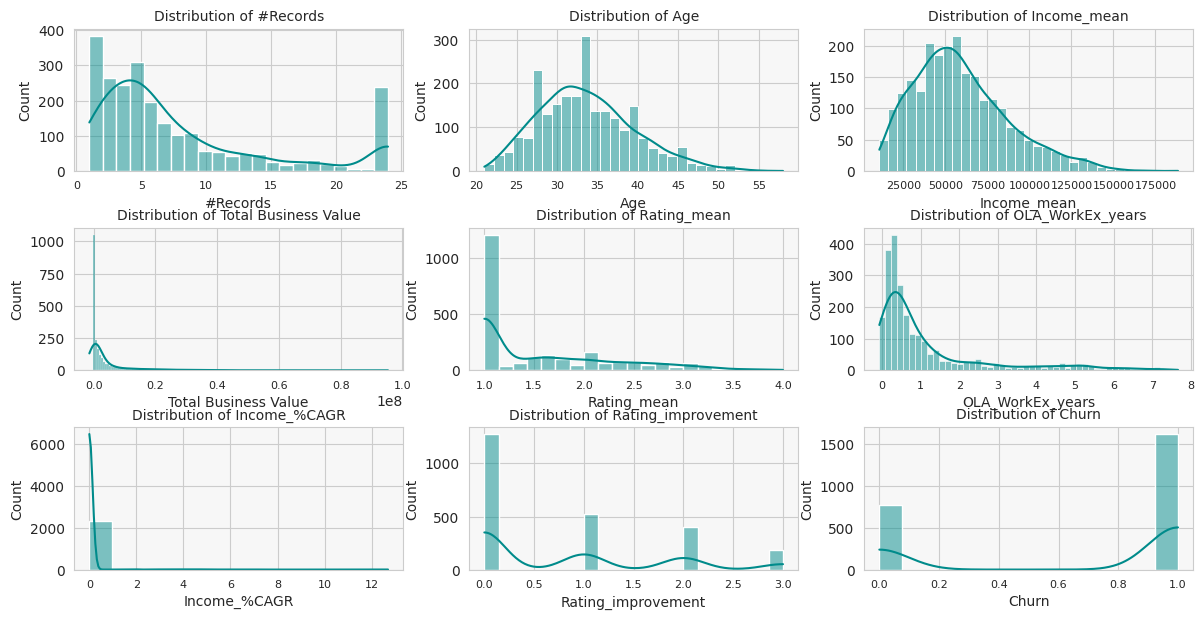

In [39]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(num_col):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(df2[col], kde=True, color= 'darkcyan', ax=axs[row_idx, col_idx]);

    axs[row_idx, col_idx].set_title(f'Distribution of {col}', fontsize=10)
    axs[row_idx, col_idx].tick_params(axis='x', labelrotation=0, labelsize=8)

plt.show()

In [40]:
cat_col

Index(['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade'], dtype='object')

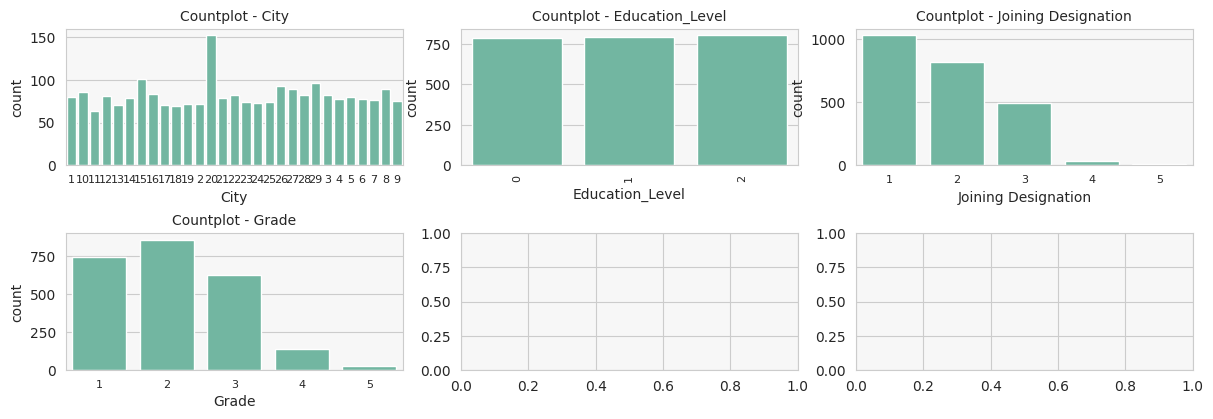

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 4))
plt.tight_layout()
plt.subplots_adjust(hspace=.5)

for i, col in enumerate(cat_col[1:]):
    row_idx = i // 3
    col_idx = i % 3

    sns.countplot(data=df2, x=col, ax=axs[row_idx, col_idx])

    axs[row_idx, col_idx].set_title(f'Countplot - {col}', fontsize=10)
    axs[row_idx, col_idx].tick_params(axis='x', labelrotation=0, labelsize=8)


axs[0, 1].tick_params(axis='x', labelrotation=90)
plt.show()

## Bivariate Analysis

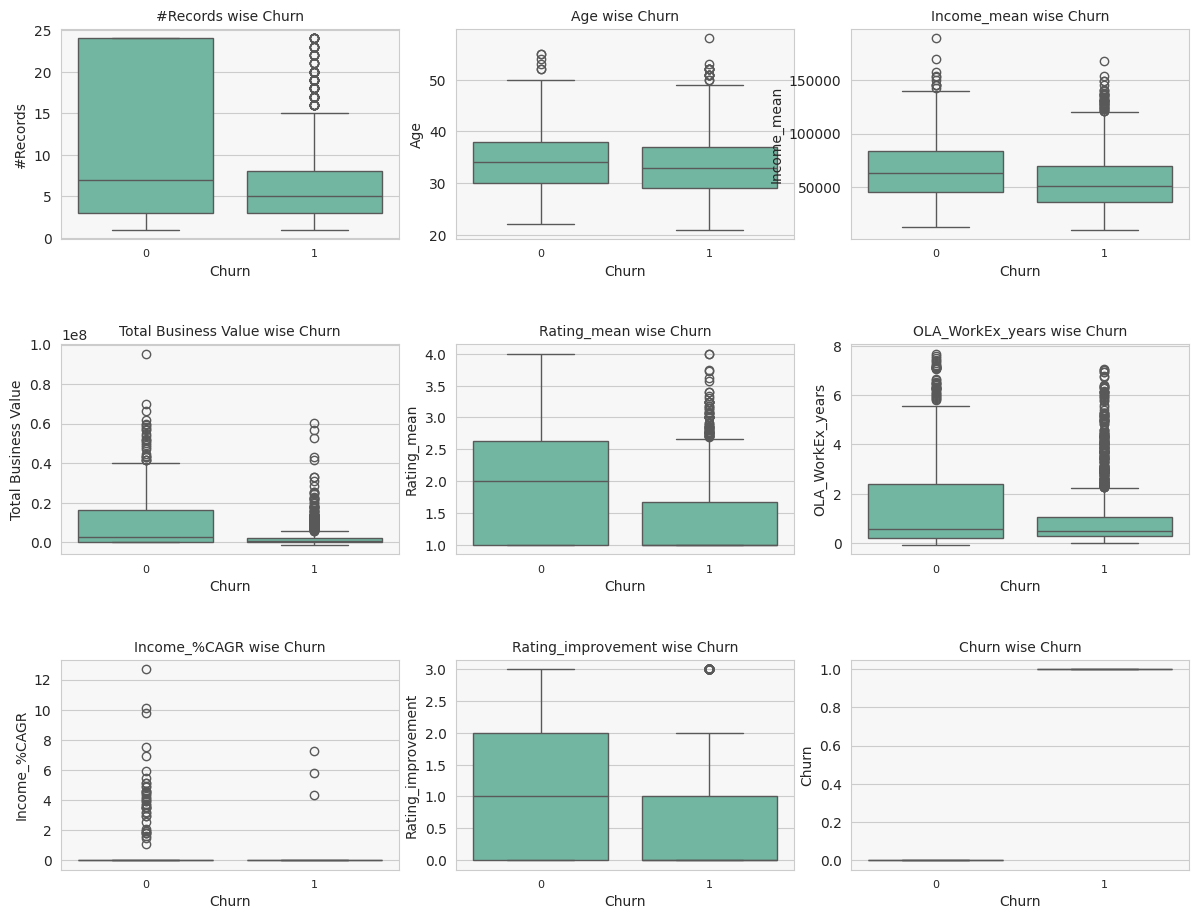

In [42]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
plt.tight_layout()
plt.subplots_adjust(hspace=.5)

for i, col in enumerate(num_col):
    row_idx = i // 3
    col_idx = i % 3

    sns.boxplot(data=df2, x='Churn', y=col, ax=axs[row_idx, col_idx])

    axs[row_idx, col_idx].set_title(f'{col} wise Churn', fontsize=10)
    axs[row_idx, col_idx].tick_params(axis='x', labelrotation=0, labelsize=8)
plt.show()

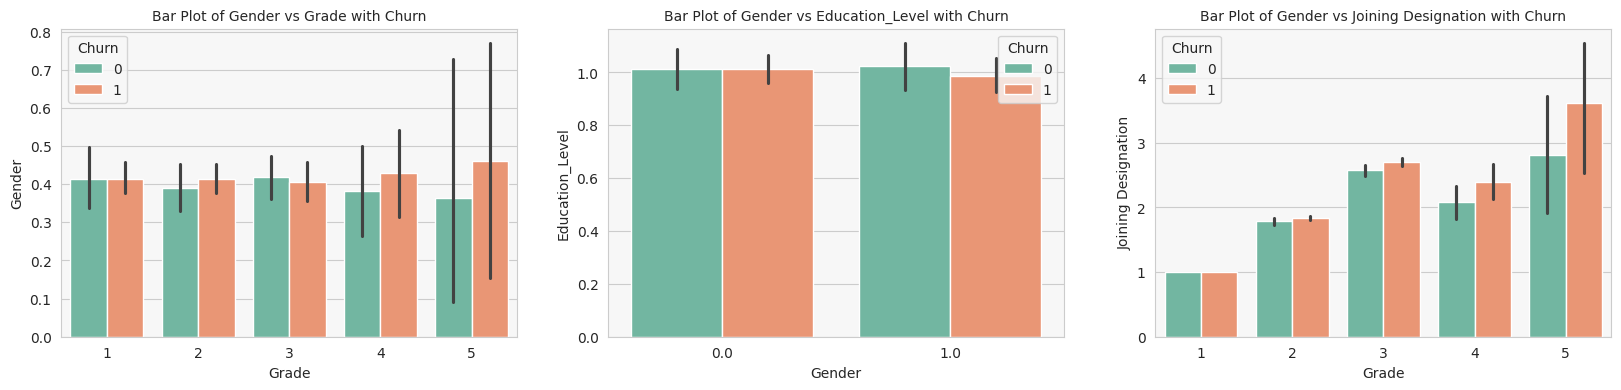

In [43]:
plt.figure(figsize= (20,4))
plt.subplot(1,3,1)
grade_order = sorted(df2['Grade'].unique())
sns.barplot(data=df2, x='Grade', y='Gender', hue='Churn', order=grade_order)
plt.xlabel('Grade')
plt.ylabel('Gender')
plt.title('Bar Plot of Gender vs Grade with Churn', fontsize=10)
plt.gca().invert_yaxis()

plt.subplot(1,3,2)
sns.barplot(data=df2, x='Gender', y='Education_Level', hue='Churn' )
plt.xlabel('Gender')
plt.ylabel('Education_Level')
plt.title('Bar Plot of Gender vs Education_Level with Churn', fontsize=10)
plt.gca().invert_yaxis()

plt.subplot(1,3,3)
sns.barplot(data=df2, x='Grade', y='Joining Designation', hue='Churn')
plt.xlabel('Grade')
plt.ylabel('Joining Designation')
plt.title('Bar Plot of Gender vs Joining Designation with Churn', fontsize=10)
plt.gca().invert_yaxis()

plt.show()

In [44]:
df2.corr()

<ipython-input-44-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,#Records,Age,Income_mean,Total Business Value,Rating_mean,OLA_WorkEx_years,Income_%CAGR,Rating_improvement,Churn
#Records,1.000000,0.301765,0.268432,0.791473,0.727732,0.767220,0.229882,0.687856,-0.345718
Age,0.301765,1.000000,0.207989,0.263018,0.227284,0.316894,0.070596,0.186544,-0.078883
Income_mean,0.268432,0.207989,1.000000,0.368632,0.187621,0.328461,0.038713,0.174008,-0.197988
Total Business Value,0.791473,0.263018,0.368632,1.000000,0.712487,0.670349,0.361086,0.584418,-0.379552
Rating_mean,0.727732,0.227284,0.187621,0.712487,1.000000,0.522414,0.297578,0.805847,-0.373683
OLA_WorkEx_years,0.767220,0.316894,0.328461,0.670349,0.522414,1.000000,0.083143,0.491744,-0.179824
Income_%CAGR,0.229882,0.070596,0.038713,0.361086,0.297578,0.083143,1.000000,0.182088,-0.151447
Rating_improvement,0.687856,0.186544,0.174008,0.584418,0.805847,0.491744,0.182088,1.000000,-0.269588
Churn,-0.345718,-0.078883,-0.197988,-0.379552,-0.373683,-0.179824,-0.151447,-0.269588,1.000000


<ipython-input-45-f49c7004ac15>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap='coolwarm');


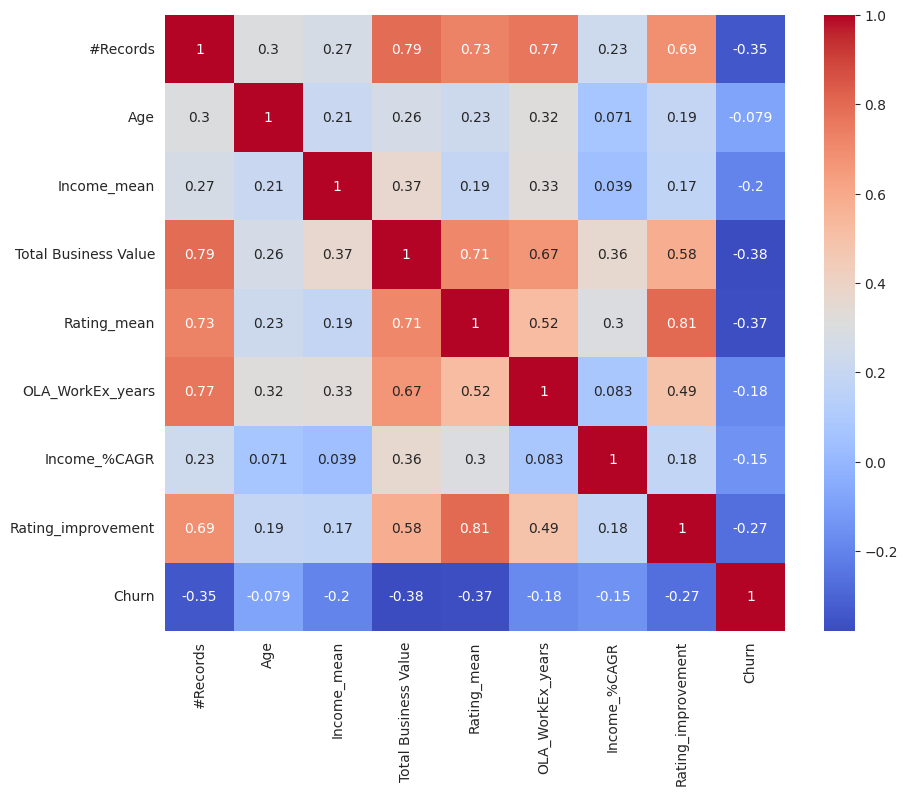

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm');

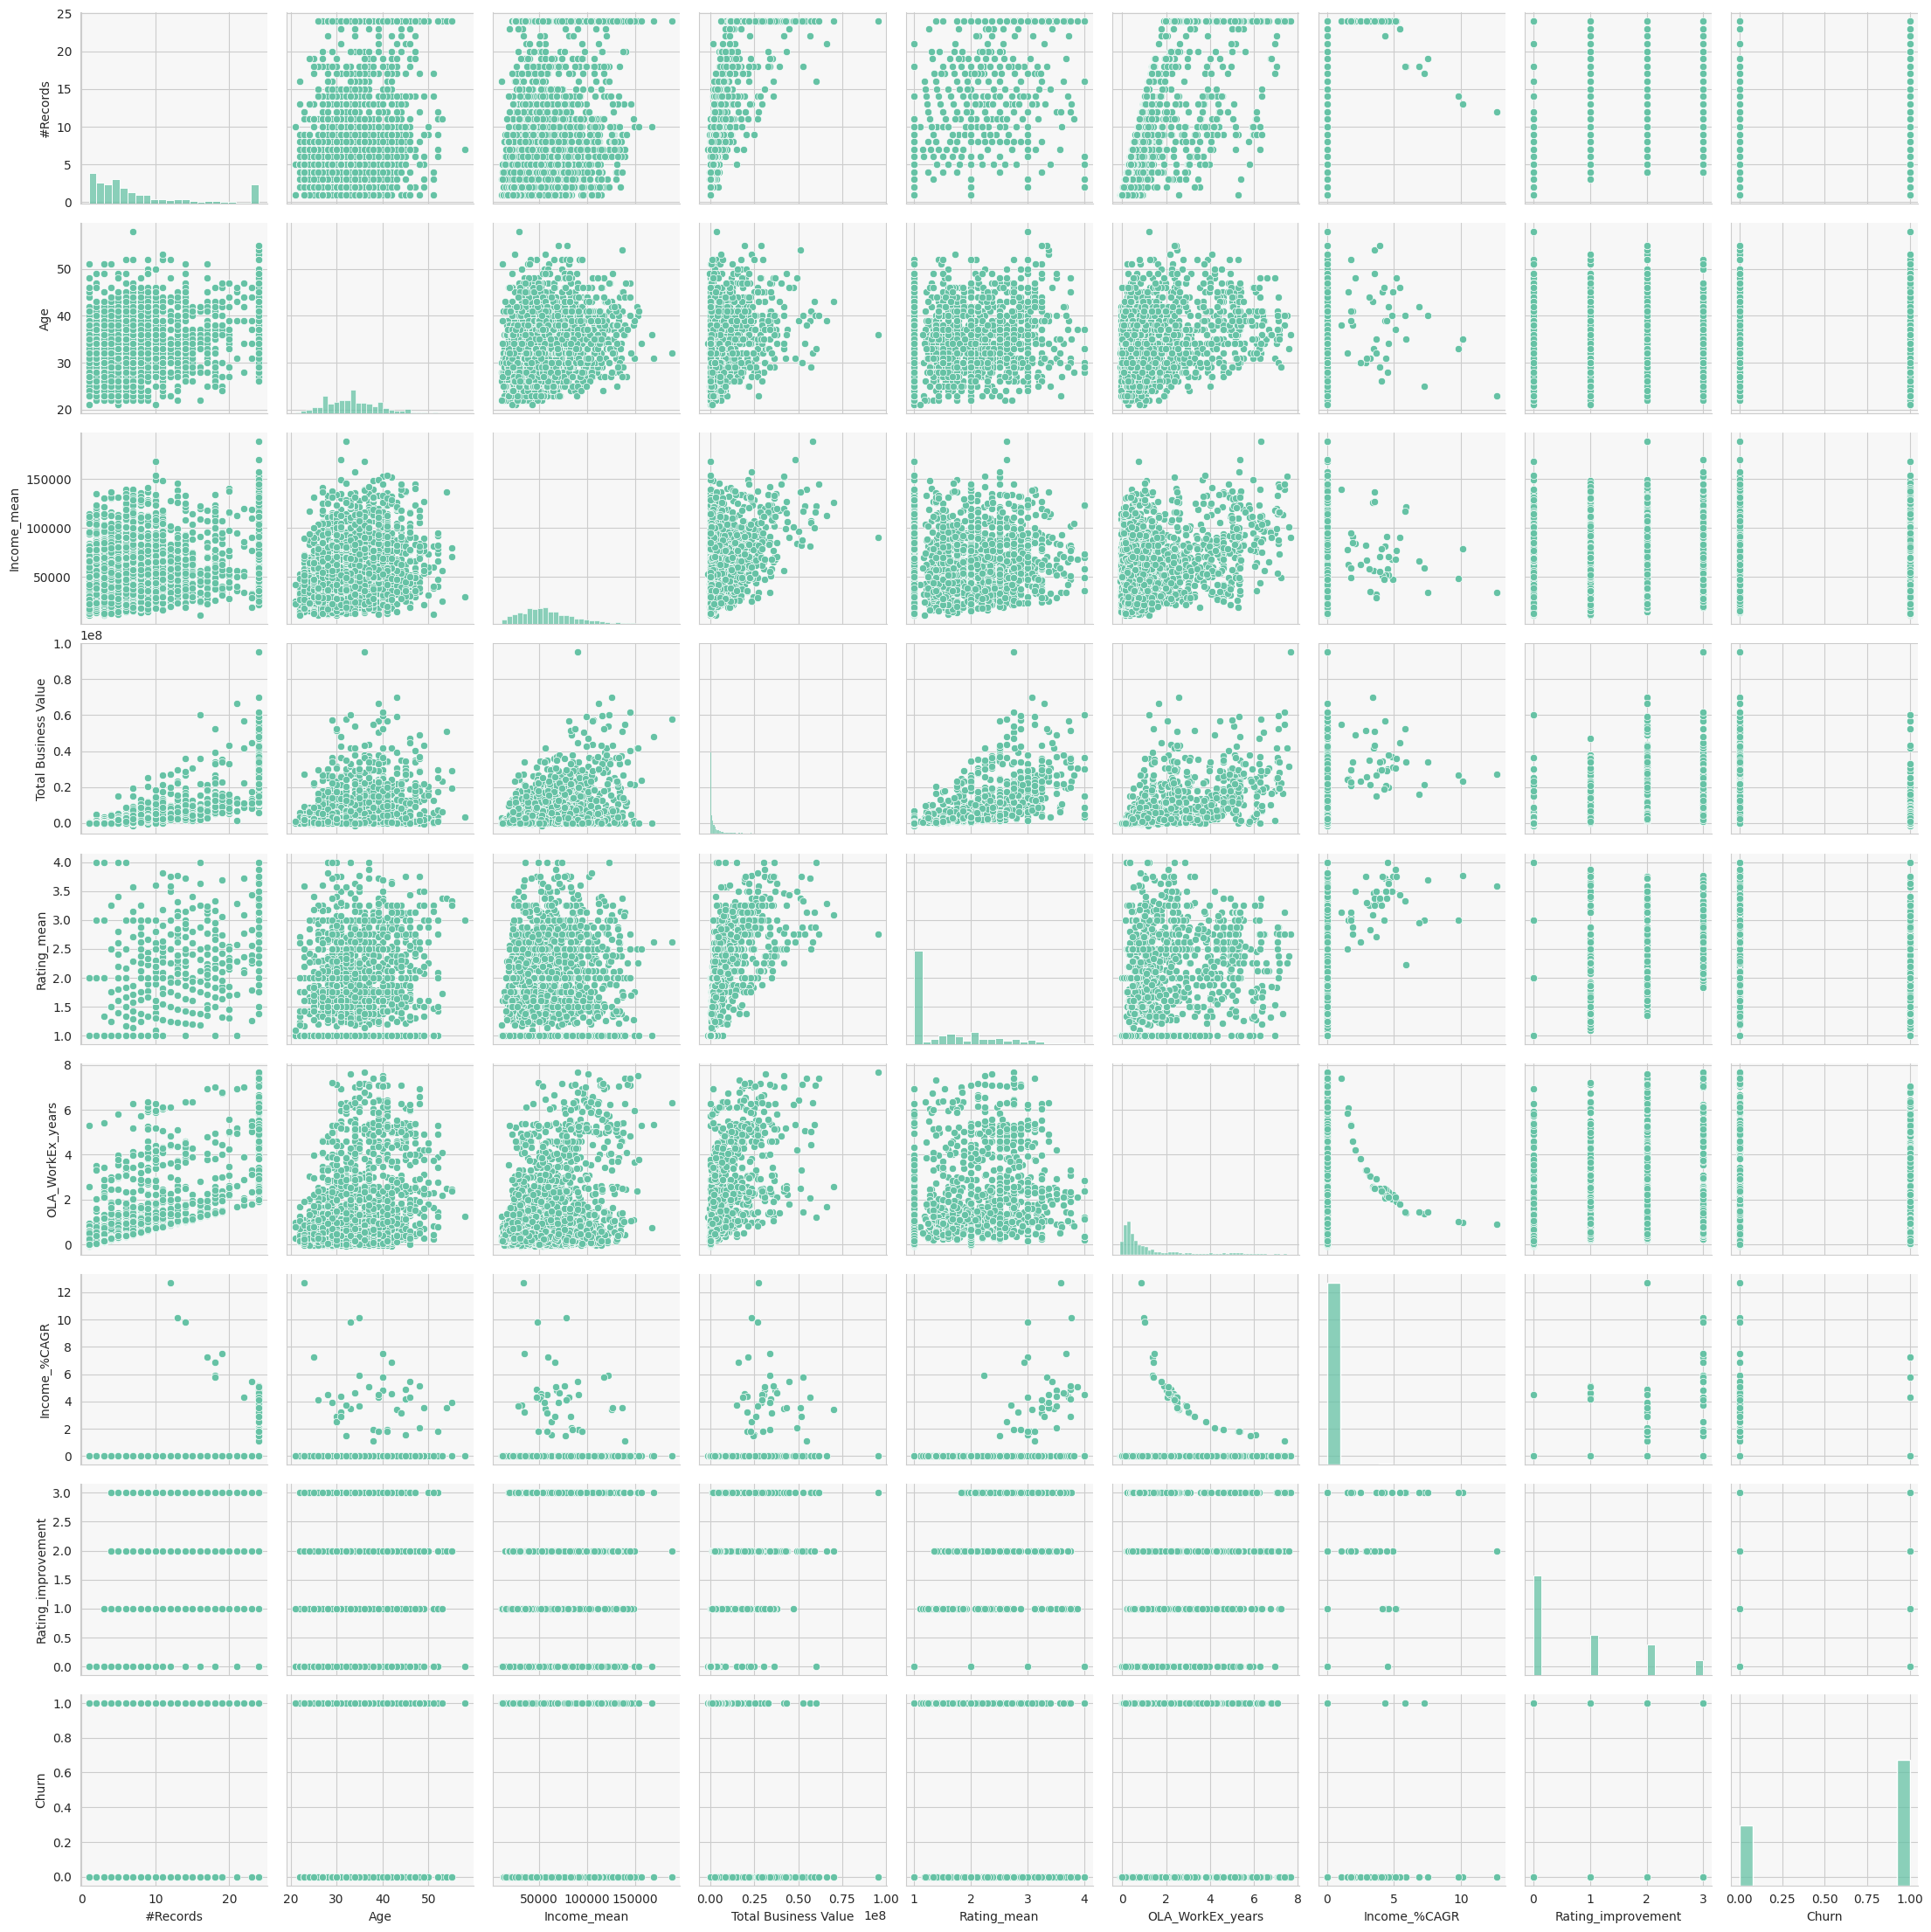

In [46]:
sns.pairplot(df2)

## Insights based on EDA

1. **Comments on range of attributes, outliers of various attributes**
  * dummy
2. **Comments on the distribution of the variables and relationship between them**
  - dummy
3. **Comments for each univariate and bivariate plots**
  - dummy

# 2. Data Preprocessing

In [47]:
df3 = df2.copy()
df3.head()

,#Records,Age,Gender,City,Education_Level,Income_mean,Joining Designation,Grade,Total Business Value,Rating_mean,OLA_WorkEx_years,Income_%CAGR,Rating_improvement,Churn
Driver_ID,,,,,,,,,,,,,,
1,3,28.0,0.0,23,2,57387.0,1,1,1715580,2.0,0.210819,0.0,0,1
2,2,31.0,0.0,7,2,67016.0,2,2,0,1.0,0.068448,0.0,0,0
4,5,43.0,0.0,13,2,65603.0,2,2,350000,1.0,0.388783,0.0,0,1
5,3,29.0,0.0,9,0,46368.0,1,1,120360,1.0,0.156061,0.0,0,1
6,5,31.0,1.0,11,1,78728.0,3,3,1265000,1.6,0.336763,0.0,1,0


## Duplicate value check

In [48]:
df3.duplicated().sum()

0

In [49]:
# df3[df3[['Dateofjoining','Gender', 'Age', '#Records', 'Churn', 'Joining Designation', 'Education_Level']].duplicated()]

## Missing Values

In [50]:
df3.isna().sum().sum()

0

## Outliers Treatment

In [51]:
num_col

Index(['#Records', 'Age', 'Income_mean', 'Total Business Value', 'Rating_mean',
       'OLA_WorkEx_years', 'Income_%CAGR', 'Rating_improvement', 'Churn'],
      dtype='object')

In [52]:
# sns.histplot(df3['Total Business Value'])

## Binning and Encoding

### **Binning `Age`**

In [53]:
# Minimum and Maximum value of the Age
df3.Age.min(), df3.Age.max()

(21.0, 58.0)

In [54]:
"""
Converting Age to Catagory:

Age Categories:
Young: 18-30 years
Middle-aged: 31-50 years
Senior: 50+
"""
bin_edges = [0,30, 50, 100]
bin_labels = ['Young','Middle-aged', 'Senior']

df3['Age_Group'] = pd.cut(df3['Age'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df3["Age_Group"].value_counts(normalize=True)

Middle-aged    0.670727
Young          0.320874
Senior         0.008400
Name: Age_Group, dtype: float64

In [55]:
df3['Age_Group'].cat.categories

Index(['Young', 'Middle-aged', 'Senior'], dtype='object')

In [56]:
df3['Age_Group'] = df3['Age_Group'].cat.codes

### **Binning `Income_mean`**

<Axes: ylabel='Frequency'>

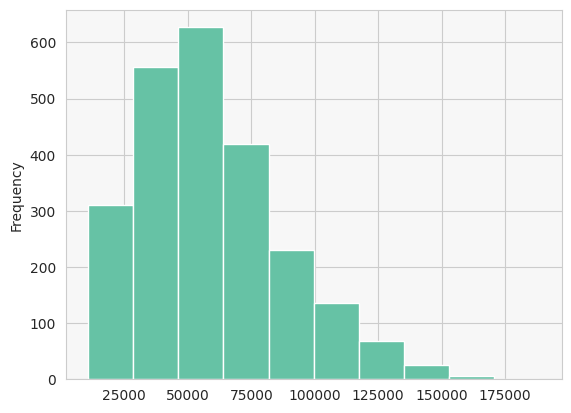

In [57]:
df3['Income_mean'].plot(kind='hist')

In [58]:
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
bin_edges = df3.Income_mean.quantile(percentiles)
bin_edges

0.00     10747.0
0.25     39104.0
0.50     55285.0
0.75     75835.0
1.00    188418.0
Name: Income_mean, dtype: float64

In [59]:
bin_labels = ['Low','Medium', 'High', 'Affluent']
df3['Income_Group'] = pd.cut(df3['Income_mean'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df3["Income_Group"].value_counts(normalize=True)

Low         0.250315
Medium      0.249895
High        0.249895
Affluent    0.249895
Name: Income_Group, dtype: float64

In [60]:
# df3['Income_Group'] = df3['Income'].astype('category')
df3['Income_Group'].cat.categories

Index(['Low', 'Medium', 'High', 'Affluent'], dtype='object')

In [61]:
df3['Income_Group'] = df3['Income_Group'].cat.codes

### **Binning `Total Business Value`**

<Axes: ylabel='Frequency'>

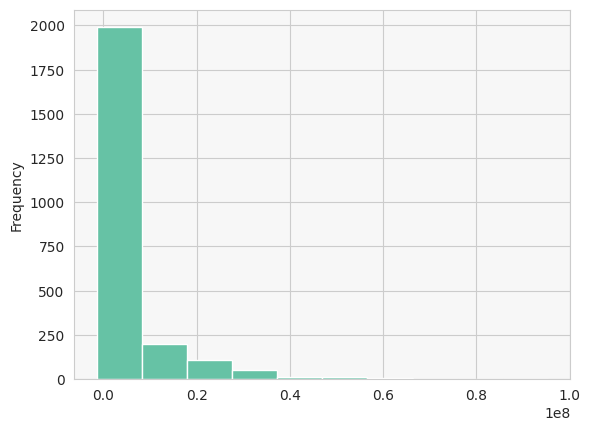

In [62]:
df3['Total Business Value'].plot(kind='hist')

In [63]:
## Minimum and Maximum Total Business Value
min_bv, max_bv = df3['Total Business Value'].min(), df3['Total Business Value'].max()
min_bv, max_bv

(-1385530, 95331060)

In [64]:
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
bin_edges = df3['Total Business Value'].quantile(percentiles)
bin_edges

0.00    -1385530.0
0.25           0.0
0.50      817680.0
0.75     4173650.0
1.00    95331060.0
Name: Total Business Value, dtype: float64

In [65]:
bin_labels = ['Negative','Low', 'Medium', 'High']

df3['Tot_Biz_val_Group'] = pd.cut(df3['Total Business Value'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df3["Tot_Biz_val_Group"].value_counts(normalize=True)

Negative    0.306174
Medium      0.249895
High        0.249895
Low         0.194036
Name: Tot_Biz_val_Group, dtype: float64

In [66]:
df3['Tot_Biz_val_Group'].cat.categories

Index(['Negative', 'Low', 'Medium', 'High'], dtype='object')

In [67]:
df3['Tot_Biz_val_Group']=df3['Tot_Biz_val_Group'].cat.codes

### **Binning `Rating_mean`**

In [68]:
df3['Rating_mean']=df3['Rating_mean'].apply(lambda x: int(np.round(x,0)))

### **Binning `Ola_WorkEx`**

In [69]:
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
bin_edges = df3['OLA_WorkEx_years'].quantile(percentiles)
bin_edges

0.00   -0.073923
0.25    0.254625
0.50    0.503775
0.75    1.297768
1.00    7.668878
Name: OLA_WorkEx_years, dtype: float64

In [70]:
bin_edges = [0, 0.25, .5, .75, 1, 2, 10]
bin_labels = ['3-Months','6-Months', '9-Months', '12-Months', '24-Months', '>24 Months']

df3['Ola_WorkEx_Group'] = pd.cut(df3['OLA_WorkEx_years'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df3["Ola_WorkEx_Group"].value_counts(normalize=True)

6-Months      0.256134
3-Months      0.227723
>24 Months    0.185105
24-Months     0.133879
9-Months      0.118381
12-Months     0.078777
Name: Ola_WorkEx_Group, dtype: float64

In [71]:
df3['Ola_WorkEx_Group'].cat.categories

Index(['3-Months', '6-Months', '9-Months', '12-Months', '24-Months',
       '>24 Months'],
      dtype='object')

In [72]:
df3['Ola_WorkEx_Group']=df3['Ola_WorkEx_Group'].cat.codes

### **Encoding**

In [73]:
df3.columns, num_col, cat_col

(Index(['#Records', 'Age', 'Gender', 'City', 'Education_Level', 'Income_mean',
        'Joining Designation', 'Grade', 'Total Business Value', 'Rating_mean',
        'OLA_WorkEx_years', 'Income_%CAGR', 'Rating_improvement', 'Churn',
        'Age_Group', 'Income_Group', 'Tot_Biz_val_Group', 'Ola_WorkEx_Group'],
       dtype='object'),
 Index(['#Records', 'Age', 'Income_mean', 'Total Business Value', 'Rating_mean',
        'OLA_WorkEx_years', 'Income_%CAGR', 'Rating_improvement', 'Churn'],
       dtype='object'),
 Index(['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade'], dtype='object'))

In [74]:
df3 = pd.get_dummies(df3, columns=['City'])

In [75]:
df3['Gender'] = df3['Gender'].cat.codes
df3['Education_Level'] = df3['Education_Level'].cat.codes
df3['Joining Designation'] = df3['Joining Designation'].cat.codes
df3['Grade'] = df3['Grade'].cat.codes

In [76]:
df3.head(2)

,#Records,Age,Gender,Education_Level,Income_mean,Joining Designation,Grade,Total Business Value,Rating_mean,OLA_WorkEx_years,...,City_27,City_28,City_29,City_3,City_4,City_5,City_6,City_7,City_8,City_9
Driver_ID,,,,,,,,,,,,,,,,,,,,,
1,3,28.0,0,2,57387.0,0,0,1715580,2,0.210819,...,0,0,0,0,0,0,0,0,0,0
2,2,31.0,0,2,67016.0,1,1,0,1,0.068448,...,0,0,0,0,0,0,0,1,0,0


In [77]:
df4 = df3.drop(columns=['Age', 'Income_mean', 'Total Business Value', 'OLA_WorkEx_years'])
df4.head()

,#Records,Gender,Education_Level,Joining Designation,Grade,Rating_mean,Income_%CAGR,Rating_improvement,Churn,Age_Group,...,City_27,City_28,City_29,City_3,City_4,City_5,City_6,City_7,City_8,City_9
Driver_ID,,,,,,,,,,,,,,,,,,,,,
1,3,0,2,0,0,2,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2,1,1,1,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,5,0,2,1,1,1,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,3,0,0,0,0,1,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,5,1,1,2,2,2,0.0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# 3. Model Building

## Building a Random Forest Model

In [78]:
df4.dtypes

#Records                 int64
Gender                    int8
Education_Level           int8
Joining Designation       int8
Grade                     int8
Rating_mean              int64
Income_%CAGR           float64
Rating_improvement       int64
Churn                    int64
Age_Group                 int8
Income_Group              int8
Tot_Biz_val_Group         int8
Ola_WorkEx_Group          int8
City_1                   uint8
City_10                  uint8
City_11                  uint8
City_12                  uint8
City_13                  uint8
City_14                  uint8
City_15                  uint8
City_16                  uint8
City_17                  uint8
City_18                  uint8
City_19                  uint8
City_2                   uint8
City_20                  uint8
City_21                  uint8
City_22                  uint8
City_23                  uint8
City_24                  uint8
City_25                  uint8
City_26                  uint8
City_27 

In [79]:
X = df4[df4.columns.drop('Churn')]
y = df4['Churn']

In [80]:
# Train, validation, and test split
X_train_val, X_test, y_train_val, y_test= train_test_split(X,y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size=0.25)
X_train.shape,X_val.shape, X_test.shape

((1428, 41), (476, 41), (477, 41))

In [81]:
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
model1.score(X_train,y_train)

0.9978991596638656

In [83]:
model1.score(X_val,y_val)

0.8088235294117647

## Cross Validation

In [84]:
cv = RepeatedKFold(n_splits=10, n_repeats=3)
scores = cross_val_score(model1, X_train, y_train, scoring = 'accuracy', cv=cv)
print('Cross Validation Scores %.4f'%np.mean(scores))

Cross Validation Scores 0.8196


## **Classification Report**

In [85]:
y_true = y_val
y_pred = model1.predict(X_val)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.58      0.65       149
           1       0.83      0.91      0.87       327

    accuracy                           0.81       476
   macro avg       0.79      0.75      0.76       476
weighted avg       0.80      0.81      0.80       476



## **Confusion Matrix**

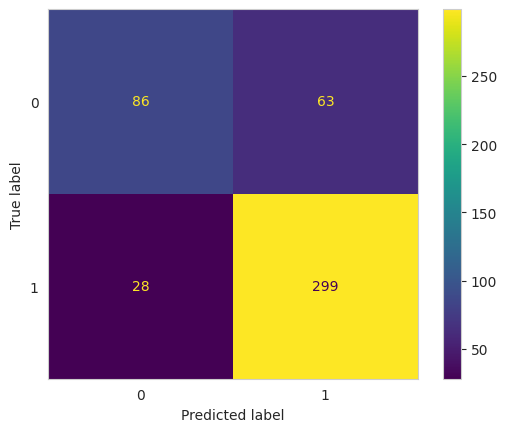

In [86]:
conf_matrix=confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.grid(False)

## Class Imbalance and Hyperparameter Tuning

In [87]:
y.value_counts(normalize=False)

1    1616
0     765
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Class Imbalance')

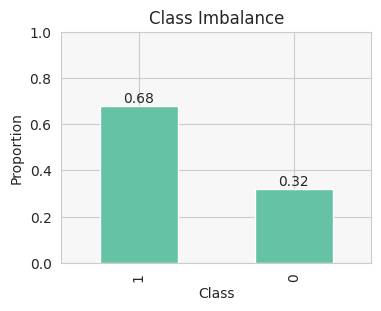

In [88]:
# plotting
plt.figure(figsize=(4,3))
fig=y.value_counts(normalize=True).round(2).plot(kind='bar');
fig.bar_label(fig.containers[0], label_type='edge');
plt.ylim([0.0,1.0]);
plt.xlabel('Class');
plt.ylabel('Proportion');
plt.title('Class Imbalance')

In [89]:
## Class Weights: Adjusting class weights
print('Factor: %.4f' % (y.value_counts(normalize=False)[1]/y.value_counts(normalize=False)[0]))

Factor: 2.1124


In [90]:
## Cross Validation

cv = RepeatedKFold(n_splits=10, n_repeats=3)
for depth in range(2,21,2):
  model = RandomForestClassifier(max_depth = depth)
  model.fit(X_train,y_train)
  print('Max_depth =',depth)
  # print(model.get_n_leaves())
  cv_score = cross_val_score(model, X, y, scoring = 'f1', cv=cv)
  print('Mean Validation Score : %.3f'% cv_score.mean())
  print('*'*50)

Max_depth = 2
Mean Validation Score : 0.853
**************************************************
Max_depth = 4
Mean Validation Score : 0.867
**************************************************
Max_depth = 6
Mean Validation Score : 0.870
**************************************************
Max_depth = 8
Mean Validation Score : 0.877
**************************************************
Max_depth = 10
Mean Validation Score : 0.878
**************************************************
Max_depth = 12
Mean Validation Score : 0.879
**************************************************
Max_depth = 14
Mean Validation Score : 0.880
**************************************************
Max_depth = 16
Mean Validation Score : 0.881
**************************************************
Max_depth = 18
Mean Validation Score : 0.879
**************************************************
Max_depth = 20
Mean Validation Score : 0.880
**************************************************


In [91]:
## Hypermeter Tuning

for depth in range(5,16,1):
  model = RandomForestClassifier(max_depth=depth)
  model_cw = RandomForestClassifier(class_weight={0: 2.0, 1: 1.0}, max_depth = depth)

  model.fit(X_train,y_train)
  model_cw.fit(X_train,y_train)

  print('Max_depth =',depth)
  # print('Class_Weights =',{0: 2.0, 1: 1.0} )

  # print(model.get_n_leaves())
  print('Without Class-Weights:')
  print('Train Accuracy: %.3f' % model.score(X_train,y_train))
  print('Validation Score: %.3f' % model.score(X_val,y_val))

  print()
  print('With Class-Weights:')
  print('Train Accuracy: %.3f' % model_cw.score(X_train,y_train))
  print('Validation Score: %.3f' % model_cw.score(X_val,y_val))

  print('*'*50)

Max_depth = 5
Without Class-Weights:
Train Accuracy: 0.805
Validation Score: 0.794

With Class-Weights:
Train Accuracy: 0.793
Validation Score: 0.775
**************************************************
Max_depth = 6
Without Class-Weights:
Train Accuracy: 0.812
Validation Score: 0.800

With Class-Weights:
Train Accuracy: 0.837
Validation Score: 0.784
**************************************************
Max_depth = 7
Without Class-Weights:
Train Accuracy: 0.819
Validation Score: 0.800

With Class-Weights:
Train Accuracy: 0.864
Validation Score: 0.796
**************************************************
Max_depth = 8
Without Class-Weights:
Train Accuracy: 0.842
Validation Score: 0.811

With Class-Weights:
Train Accuracy: 0.880
Validation Score: 0.805
**************************************************
Max_depth = 9
Without Class-Weights:
Train Accuracy: 0.864
Validation Score: 0.815

With Class-Weights:
Train Accuracy: 0.894
Validation Score: 0.809
**********************************************

In [92]:
# ## Grid Search Cross Validation for Hyper-parameter Tuning
# params = {
#           'n_estimators' : [100, 200, 300],
#           'max_depth' : [7, 8, 9, 10, 11, 12, 14, 15],
#           'criterion' : ['gini', 'entropy'],
#           'min_samples_split': [2,5,10,30,50],
#           'min_samples_leaf':[1,3,5,10,20,20,40],
#           'bootstrap' : [True, False],
#           'max_features': ['sqrt', 'log2', None],
#           "ccp_alpha":[0.001,0.01,0.1,1,10]
# }

# grid = GridSearchCV(estimator = RandomForestClassifier(),
#                     param_grid = params,
#                     scoring = 'accuracy',
#                     cv = 3,
#                     n_jobs=-1
#                     )

# grid.fit(X_train, y_train)
# print("Best params: ", grid.best_params_)
# print("Best score: ", grid.best_score_)

In [93]:
"""
Best params:  {'bootstrap': True, 'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'n_estimators': 100}
Best score:  0.7738172625496571
"""

"\nBest params:  {'bootstrap': True, 'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'n_estimators': 100}\nBest score:  0.7738172625496571\n"

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [7, 8, 9, 10, 11, 12, 14, 15],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 30, 50],
    'min_samples_leaf': [1, 3, 5, 10, 20, 20, 40],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': [0.001, 0.01, 0.1, 1, 10]
}

# Initialize RandomizedSearchCV with RandomForestClassifier
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=params,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Perform the random search
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best params: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Best params:  {'n_estimators': 300, 'min_samples_split': 50, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 14, 'criterion': 'entropy', 'ccp_alpha': 0.001, 'bootstrap': True}
Best score:  0.8263305322128852


In [95]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 50,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 14,
 'criterion': 'entropy',
 'ccp_alpha': 0.001,
 'bootstrap': True}

In [96]:
model2 = RandomForestClassifier(**random_search.best_params_)
model2.fit(X_train, y_train)

print("Train Score: %.4f"% model2.score(X_train, y_train))
print("Validation Score: %.4f"% model2.score(X_val, y_val))

Train Score: 0.8550
Validation Score: 0.8382


### Feature Importance

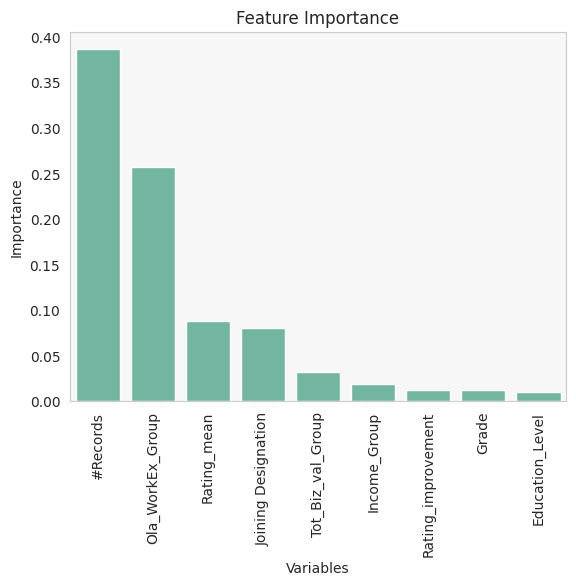

In [97]:
importances = model2.feature_importances_
variables = X.columns
FI = pd.DataFrame({"Variables": variables,
                   "Importance": importances
                  })

FI_sorted= FI[FI['Importance']>0.01].sort_values(by = ['Importance'], ascending=False)
sns.barplot(x='Variables', y='Importance', data=FI_sorted);
plt.title('Feature Importance')
plt.xticks( rotation=90)
plt.grid(False)

# 4. Result Evaluation

In [98]:
y_true = y_test
y_pred = model2.predict(X_test)

In [99]:
class ModelEvaluator:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def calculate_scores(self):
        """
        Calculate Accuracy, Precision, Recall, and F1 Scores
        """
        acc = accuracy_score(self.y_true, self.y_pred)
        precision = precision_score(self.y_true, self.y_pred)
        recall = recall_score(self.y_true, self.y_pred)
        f1 = f1_score(self.y_true, self.y_pred)
        return acc, precision, recall, f1

    def print_results(self, acc, precision, recall, f1):
        """
        Print Results
        """
        print(f"Accuracy Score : {acc:.4f}")
        print(f"Precision Score: {precision:.4f}")
        print(f"Recall Score   : {recall:.4f}")
        print(f"F1 Score       : {f1:.4f}")

    def evaluate_and_print(self):
        """
        Evaluate and print results
        """
        acc, precision, recall, f1 = self.calculate_scores()
        self.print_results(acc, precision, recall, f1)

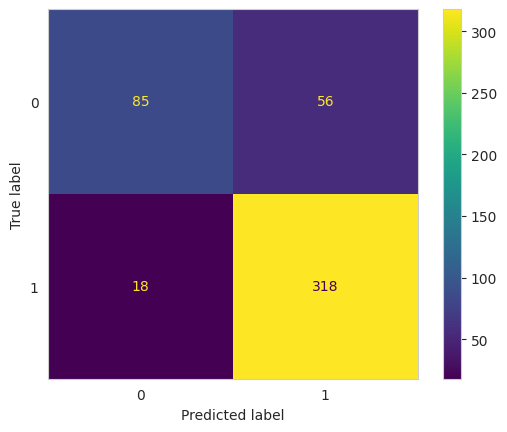

In [100]:
conf_matrix=confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.grid(False)

In [101]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.60      0.70       141
           1       0.85      0.95      0.90       336

    accuracy                           0.84       477
   macro avg       0.84      0.77      0.80       477
weighted avg       0.84      0.84      0.84       477



In [102]:
# Test Results
print('Test Results')
print('*'*30)

y_true = y_test
y_pred = model2.predict(X_test)
evaluator = ModelEvaluator(y_true, y_pred)
evaluator.evaluate_and_print()

Test Results
******************************
Accuracy Score : 0.8449
Precision Score: 0.8503
Recall Score   : 0.9464
F1 Score       : 0.8958


## XGBoost

In [103]:
model3 = XGBClassifier()

In [104]:
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
y_pred = model3.predict(X_train)

In [106]:
parameters = {"max_depth":[2,4,6,10,12,14],
             "n_estimators":[100,200,300],
              }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


grid_search.fit(X_train,y_train.values.ravel())
grid_search.best_estimator_
grid_search.best_score_
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [107]:
model4 = XGBClassifier(**grid_search.best_params_)
model4.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
print('Train Accuracy: %.3f' % model4.score(X_train,y_train))
print('Validation Score: %.3f' % model4.score(X_val,y_val))

Train Accuracy: 0.861
Validation Score: 0.840


# 4. Result Evaluation

In [109]:
y_true = y_test
y_pred = model4.predict(X_test)

In [110]:
class ModelEvaluator:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def calculate_scores(self):
        """
        Calculate Accuracy, Precision, Recall, and F1 Scores
        """
        acc = accuracy_score(self.y_true, self.y_pred)
        precision = precision_score(self.y_true, self.y_pred)
        recall = recall_score(self.y_true, self.y_pred)
        f1 = f1_score(self.y_true, self.y_pred)
        return acc, precision, recall, f1

    def print_results(self, acc, precision, recall, f1):
        """
        Print Results
        """
        print(f"Accuracy Score : {acc:.4f}")
        print(f"Precision Score: {precision:.4f}")
        print(f"Recall Score   : {recall:.4f}")
        print(f"F1 Score       : {f1:.4f}")

    def evaluate_and_print(self):
        """
        Evaluate and print results
        """
        acc, precision, recall, f1 = self.calculate_scores()
        self.print_results(acc, precision, recall, f1)

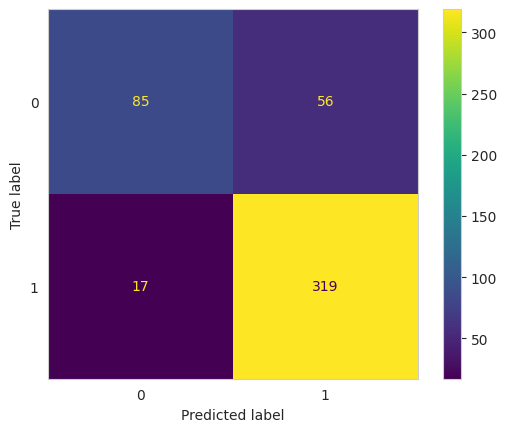

In [111]:
conf_matrix=confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.grid(False)

In [112]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.60      0.70       141
           1       0.85      0.95      0.90       336

    accuracy                           0.85       477
   macro avg       0.84      0.78      0.80       477
weighted avg       0.85      0.85      0.84       477



In [113]:
# Test Results
print('Test Results')
print('*'*30)

y_true = y_test
y_pred = model2.predict(X_test)
evaluator = ModelEvaluator(y_true, y_pred)
evaluator.evaluate_and_print()

Test Results
******************************
Accuracy Score : 0.8449
Precision Score: 0.8503
Recall Score   : 0.9464
F1 Score       : 0.8958


In [117]:
rf_probs = model2.predict_proba(X_test)[:,1]
rf_probs[:5]

array([0.58632177, 0.42868168, 0.73812717, 0.94956547, 0.66133937])

In [121]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

def plot_roc(y_test,probs):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

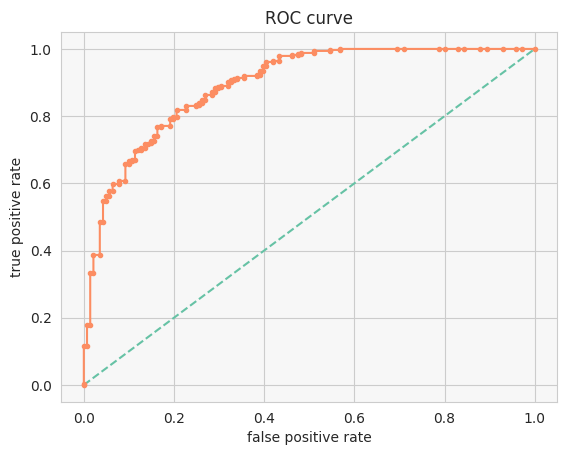

In [122]:
plot_roc(y_test , rf_probs)

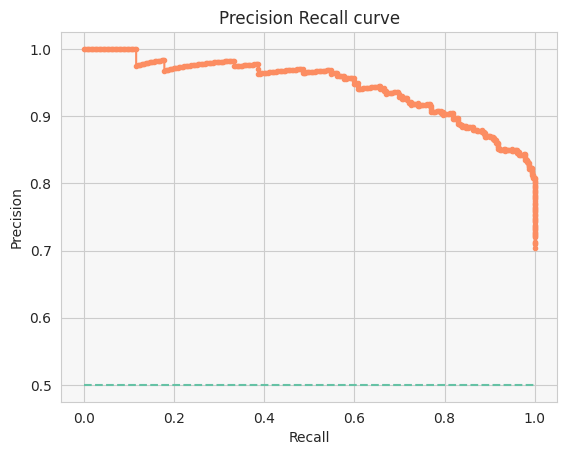

In [124]:
plot_pre_curve(y_test, rf_probs)

# 5. Actionable Insights & Recommendations

# Inferences :

from data  distribution:
Male      1380
Female     956

Churn : distribution:
1    1616 (67.870%)
0     765 (32.12%)


- Probability of Churn is higher in case of education level 0 and 1 than 2.
- in case of joining destination 1, probability of churn is higher.



- in case of quarterly rating is 1, probability of churn is significantly higher.
- also same pattern is observed in case of when driver's quarterly rating has increased through out tenure.




- due to some reason , for drivers who joined in 2018 and 2019 , probability of churn is very high compare to 2020 and before 2018.



#### Random Forest :
- train and test score : (0.8697478991596639, 0.8679245283018868)
- feature importance : highest is : joining year , followed by No of records available in data, and total business value.
- recall : 0.866
- precision: 0.928
- f1-score : 0.89


#### on Grid Search CV : RF :
- best params : ccp_alpha=0.001, max_depth=10, max_features=7,n_estimators=300
- Gridsearch RF best score : 0.8881417819617973


#### Bagging Classfier : wwith Decision Tree :
- with 50 DTs. when max_depth=7, class_weight="balanced"
- f1 score : 0.9064039408866995
- precision : 0.9387755102040817
- recall_score : 0.8761904761904762
- accuracy: 0.880




#### XGBoost Classifier: (Grid SEARCH CV : ) 'max_depth': 2, 'n_estimators': 100
- test Scores :
- Accuracy : 0.87
- f1 score : 0.90
- recall : 0.923
- precision : 0.884

- feature importance : highest is : joining year , followed by No of records available in data, and total business value.




#### GradientBoostingClassifier : GBDC:

- Train Score :  0.914390756302521
- Test Score :  0.8909853249475891
- Accuracy Score :  0.8909853249475891
- ROC-AUC score  test dataset:   0.9447855910621867
- precision score  test dataset:   0.9287925696594427
- Recall score  test dataset:   0.9118541033434651
- f1 score  test dataset :   0.9202453987730062

Questionnaire (Answers should present in the text editor along with insights):
1. What percentage of drivers have received a quarterly rating of 5?
2. Comment on the correlation between Age and Quarterly Rating.
3. Name the city which showed the most improvement in Quarterly Rating over
the past year
4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
(T/F)
5. If a driver's Quarterly Rating drops significantly, how does it impact their Total
Business Value in the subsequent period?
6. From Ola's perspective, which metric should be the primary focus for driver
retention?
  1. ROC AUC
  2. Precision
  3. Recall
  4. F1 Score
7. How does the gap in precision and recall affect Ola's relationship with its drivers and customers?
8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?
9. Will the driver's performance be affected by the City they operate in? (Yes/No)
10. Analyze any seasonality in the driver's ratings. Do certain times of the year
correspond to higher or lower ratings, and why might that be?

In [131]:
'''
1. What percentage of drivers have received a quarterly rating of 5?
'''

df_merged['Quarterly Rating_max'].value_counts(normalize=True)

1    0.504830
2    0.203276
3    0.149097
4    0.142797
Name: Quarterly Rating_max, dtype: float64

In [129]:
df1[df1['Quarterly Rating']==5]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating


***No Driver Received Quarterly Rating 5***

'\nAnswer: None\n'

In [137]:
"""
Q2. Comment on the correlation between Age and Quarterly Rating.
"""
df_merged.loc[: , ['Age', "Rating_mean"]].corr()

,Age,Rating_mean
Age,1.000000,0.227284
Rating_mean,0.227284,1.000000


***The is no/little correlation between 'Age' & "Rating_mean"***

In [133]:
df_merged

,#Records,Age,Gender,City,Education_Level,Income_mean,Dateofjoining,LastWorkingDate,Joining Designation,Grade,...,Rating_mean,Income_max,Income_min,Last_Date,OLA_WorkEx_years,Income_%CAGR,Quarterly Rating_max,Quarterly Rating_min,Rating_improvement,Churn
Driver_ID,,,,,,,,,,,,,,,,,,,,,
1,3,28.0,0.0,23,2,57387.0,2018-12-24,2019-03-11,1,1,...,2.000000,57387,57387,2019-03-11,0.210819,0.0,2,2,0,1
2,2,31.0,0.0,7,2,67016.0,2020-11-06,NaT,2,2,...,1.000000,67016,67016,2020-12-01,0.068448,0.0,1,1,0,0
4,5,43.0,0.0,13,2,65603.0,2019-12-07,2020-04-27,2,2,...,1.000000,65603,65603,2020-04-27,0.388783,0.0,1,1,0,1
5,3,29.0,0.0,9,0,46368.0,2019-01-09,2019-03-07,1,1,...,1.000000,46368,46368,2019-03-07,0.156061,0.0,1,1,0,1
6,5,31.0,1.0,11,1,78728.0,2020-07-31,NaT,3,3,...,1.600000,78728,78728,2020-12-01,0.336763,0.0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,24,34.0,0.0,24,0,82815.0,2015-10-15,NaT,2,3,...,2.625000,82815,82815,2020-12-01,5.130838,0.0,4,1,3,0
2785,3,34.0,1.0,9,0,12105.0,2020-08-28,2020-10-28,1,1,...,1.000000,12105,12105,2020-10-28,0.167012,0.0,1,1,0,1
2786,9,45.0,0.0,19,0,35370.0,2018-07-31,2019-09-22,2,2,...,1.666667,35370,35370,2019-09-22,1.144445,0.0,2,1,1,1


In [149]:
"""
Q3. Name the city which showed the most improvement in Quarterly Rating over the past year?
"""
df_temp['MMM-YY'] = pd.to_datetime(df_temp['MMM-YY'])

df_temp['year'] = df_temp['MMM-YY'].dt.year
city_rating = df_temp.groupby(["year",'City'])['Quarterly Rating'].mean().reset_index()
city_rating.head()

,year,City,Quarterly Rating
0,2019,C1,1.944020
1,2019,C10,1.957265
2,2019,C11,1.988848
3,2019,C12,2.002841
4,2019,C13,2.003226


In [151]:
city_ratings = pd.merge(city_rating[city_rating['year']==2019], city_rating[city_rating['year']==2020], on= 'City', suffixes=["_2019", "_2020"])
city_ratings['Improvement'] = (city_ratings['Quarterly Rating_2020']/city_ratings['Quarterly Rating_2019'] -1)*100

In [154]:
city_ratings.sort_values(by=['Improvement'], ascending=False).head()

,year_2019,City,Quarterly Rating_2019,year_2020,Quarterly Rating_2020,Improvement
21,2019,C29,2.065963,2020,2.261036,9.442251
6,2019,C15,1.910811,2020,2.061381,7.879915
16,2019,C24,2.076696,2020,2.236364,7.688533
24,2019,C5,1.986842,2020,2.096591,5.523781
27,2019,C8,2.014970,2020,2.097884,4.114877


***City C29 has shown most improvement ~9.44%***

In [159]:
"""
Q4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)
"""
df_merged.groupby(['Grade'])["Total Business Value"].mean().sort_values(ascending=False)

Grade
5    2.357335e+07
4    2.082520e+07
3    4.924236e+06
2    3.263132e+06
1    2.188876e+06
Name: Total Business Value, dtype: float64

***False, Grade 5 has highest mean Total business Value***

In [195]:
"""
Q5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?
"""
df_temp_2020 = df_temp[df_temp['year']==2020]
df_temp_2020['Quarter'] = df_temp_2020['MMM-YY'].dt.quarter
df_temp_2020 = df_temp_2020.groupby(['Driver_ID', 'Quarter'])[['Quarterly Rating','Total Business Value']].agg({'Quarterly Rating': "mean", "Total Business Value": "mean"}).reset_index()
df_temp_2020

<ipython-input-195-b8e76d2ddc24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_2020['Quarter'] = df_temp_2020['MMM-YY'].dt.quarter


,Driver_ID,Quarter,Quarterly Rating,Total Business Value
0,2,4,1.0,0.000000
1,4,1,1.0,116666.666667
2,4,2,1.0,0.000000
3,6,3,1.0,0.000000
4,6,4,2.0,421666.666667
...,...,...,...,...
3658,2785,3,1.0,0.000000
3659,2785,4,1.0,0.000000
3660,2788,2,1.0,0.000000
3661,2788,3,3.0,562113.333333


In [199]:
threshold_drop = .5  # Adjust as needed

# Calculate the change in Quarterly Rating for each driver
df_temp_2020['Rating_Drop'] = df_temp_2020.groupby('Driver_ID')['Quarterly Rating'].diff()

# Identify drivers with a significant drop in Quarterly Rating
significant_drop_drivers = df_temp_2020[df_temp_2020['Rating_Drop'] < -threshold_drop]['Driver_ID']

# Determine the subsequent quarter for each driver (e.g., next quarter)
df_temp_2020['Subsequent_Quarter'] = df_temp_2020['Quarter'].shift(-1)

# Calculate average TBV for drivers with and without significant drop in Quarterly Rating
avg_tbv_significant_drop = df_temp_2020[df_temp_2020['Driver_ID'].isin(significant_drop_drivers)]['Total Business Value'].mean()
avg_tbv_no_drop = df_temp_2020[~df_temp_2020['Driver_ID'].isin(significant_drop_drivers)]['Total Business Value'].mean()

print("Average TBV for drivers with significant drop in Quarterly Rating:", avg_tbv_significant_drop)
print("Average TBV for drivers without significant drop in Quarterly Rating:", avg_tbv_no_drop)


Average TBV for drivers with significant drop in Quarterly Rating: 806603.7438686286
Average TBV for drivers without significant drop in Quarterly Rating: 328019.67063492065


In [ ]:
"""
Q6. From Ola's perspective, which metric should be the primary focus for driver retention?
- ROC AUC
- Precision
- 3. Recall
- F1 Score
"""

***Recall should be the primary focus for driver retention***

From Ola's perspective, the primary focus for driver retention should be on a metric that effectively balances the trade-off between identifying drivers who are likely to be retained (true positives) and minimizing the misclassification of drivers who are not likely to be retained (false negatives).

Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive cases that were correctly identified by the model. In the context of driver retention, recall would indicate the ability of the model to correctly identify drivers who are likely to stay with Uber. Maximizing recall would mean reducing the number of false negatives, which are drivers who are at risk of leaving but were not identified by the model.

Therefore, from Ola's perspective, the primary focus for driver retention should be on Recall.

In [ ]:
"""
7. How does the gap in precision and recall affect Ola's relationship with its drivers and customers?
"""

The gap between precision and recall in Uber's driver retention model can have significant implications for Ola's relationship with its drivers and customers.

1. **Impact on Drivers**:
   - High precision and low recall: If Ola's model has high precision but low recall, it means that the model correctly identifies most of the retained drivers (high precision) but misses many drivers who are at risk of leaving (low recall). This could lead to a situation where Uber focuses its efforts on retaining drivers who are already likely to stay, neglecting those who need more attention. Drivers who feel neglected or undervalued may become dissatisfied and may eventually decide to leave the platform.
   - Low precision and high recall: Conversely, if the model has low precision but high recall, it means that Ola identifies many drivers as at risk of leaving (high recall), but many of them are actually likely to stay (low precision). This could result in Uber bombarding drivers with retention efforts unnecessarily, which may annoy or frustrate drivers who were not considering leaving. It could also lead to wasted resources and inefficiencies in Ola's retention strategies.

2. **Impact on Customers**:
   - The impact on customers is indirect but significant. If Uber faces driver shortages due to high turnover rates caused by ineffective retention strategies, customers may experience longer wait times, reduced availability of rides, and decreased service quality. This can lead to customer dissatisfaction, loss of trust in the platform, and ultimately, customers may seek alternative transportation options.

Overall, the gap between precision and recall in Ola's driver retention model can affect Ola's relationship with both its drivers and customers by influencing driver satisfaction, retention rates, service quality, and customer experience. It underscores the importance of developing a balanced model that effectively identifies drivers at risk of leaving while minimizing false positives and negatives.

In [ ]:
"""
8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?
"""

Besides the obvious features like "Number of Rides," several lesser-discussed features might have a strong impact on a driver's Quarterly Rating in Ola. Here are some examples:

1. **Average Trip Distance**: Drivers who consistently handle longer trips may be perceived as providing better service or have a higher likelihood of receiving higher ratings from passengers who appreciate longer rides.

2. **Time of Day and Day of Week**: The time of day and day of the week when a driver operates can influence their rating. For example, drivers working during peak hours or on weekends may encounter more traffic or challenging situations that affect passenger satisfaction.

3. **Cancellation Rate**: The rate at which a driver cancels rides after accepting them can impact their Quarterly Rating. High cancellation rates may indicate unreliability or poor service quality from the driver's perspective.

4. **Acceptance Rate**: The percentage of ride requests that a driver accepts can also affect their rating. A low acceptance rate may signal to Uber that the driver is selective about the rides they accept, potentially impacting their overall service quality.

5. **Driver's Response Time**: The time it takes for a driver to respond to ride requests can influence passenger satisfaction. Drivers who respond quickly may receive higher ratings compared to those with slower response times.

6. **Feedback from Passengers**: Direct feedback from passengers, such as comments or ratings provided after a ride, can provide valuable insights into a driver's performance and may impact their Quarterly Rating.

7. **Driver's Navigation Skills**: A driver's ability to navigate efficiently and choose optimal routes can affect passenger satisfaction and overall ride experience, which in turn may influence their rating.

8. **Vehicle Cleanliness and Comfort**: The cleanliness and comfort of the driver's vehicle can impact passenger perceptions and satisfaction. Drivers who maintain clean and comfortable vehicles may receive higher ratings.

9. **Communication Skills**: The ability of the driver to communicate effectively with passengers, provide necessary information, and address any concerns or issues during the ride can contribute to a positive passenger experience and higher ratings.

Considering and analyzing these lesser-discussed features alongside more obvious ones like the number of rides can provide a more comprehensive understanding of the factors influencing a driver's Quarterly Rating in Ola.

In [ ]:
"""
9. Will the driver's performance be affected by the City they operate in? (Yes/No)
"""

**Feature Importance Matrix suggests there is no signifant affect of City on performance**

<Axes: xlabel='month', ylabel='Quarterly Rating'>

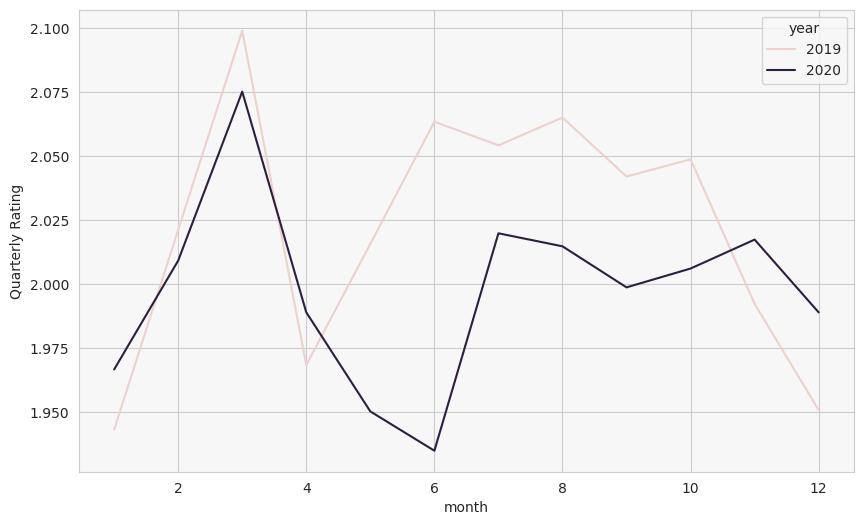

In [175]:
"""
10. Analyze any seasonality in the driver's ratings. Do certain times of the year
correspond to higher or lower ratings, and why might that be?
"""
# df_temp['MMM-YY'] = pd.datetime(df_temp['MMM-YY'])
df_temp['month'] = df_temp['MMM-YY'].dt.month

plt.figure(figsize=(10,6))
sns.lineplot(x='month', y= 'Quarterly Rating', hue= 'year', errorbar=None, data=df_temp)

***There is some seasonality***